<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/Proc_Imagens_3_Tarefa_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow

In [43]:
def filtragem_espacial_agucamento(imagem, tamanho_kernel, kk):

  # Verifica a imagem e se o kernel é ímpar
  if imagem is None:
      print("Erro: Não foi possível carregar a imagem. Verifique o caminho.")
      return
  if tamanho_kernel % 2 == 0:
      print("Erro: O do kernel deve ser um número ímpar (ex: 3, 5, 7).")
      return

  # Filtro da média
  media = cv2.blur(imagem, (tamanho_kernel,tamanho_kernel))

  # mediana = cv2.medianBlur(imagem, tamanho_kernel)

  # 2. Máscara
  mascara = cv2.subtract(imagem, media)

  # 3. Máscara de Nitidez
  nitidez = cv2.add(imagem, mascara)

  # 4. High-Boost
  high_boost = cv2.addWeighted(imagem, 1.0, mascara, kk, 0)

    #media = cv2.blur(imagem, (tamanho_kernel,tamanho_kernel))

  mediana = cv2.medianBlur(high_boost, 3)


  # Mostrar resultados
  #plt.figure(figsize=(16,8))
  plt.figure(figsize=(10,8))

  plt.subplot(2,2,1)
  plt.imshow(imagem, cmap='gray')
  plt.title("Imagem Original")
  plt.axis("off")

  plt.subplot(2,2,2)
  plt.imshow(media, cmap='gray')
  plt.title(f'Borrado com Mediana ({tamanho_kernel}x{tamanho_kernel})')
  plt.axis("off")

  plt.subplot(2,2,3)
  plt.imshow(nitidez, cmap='gray')
  plt.title(f'Máscara de Nitidez (k={kk})')
  plt.axis("off")

  plt.subplot(2,2,4)
  plt.imshow(mediana, cmap='gray')
  plt.title(f"High-Boost (k={kk})")
  plt.axis("off")

  plt.show()


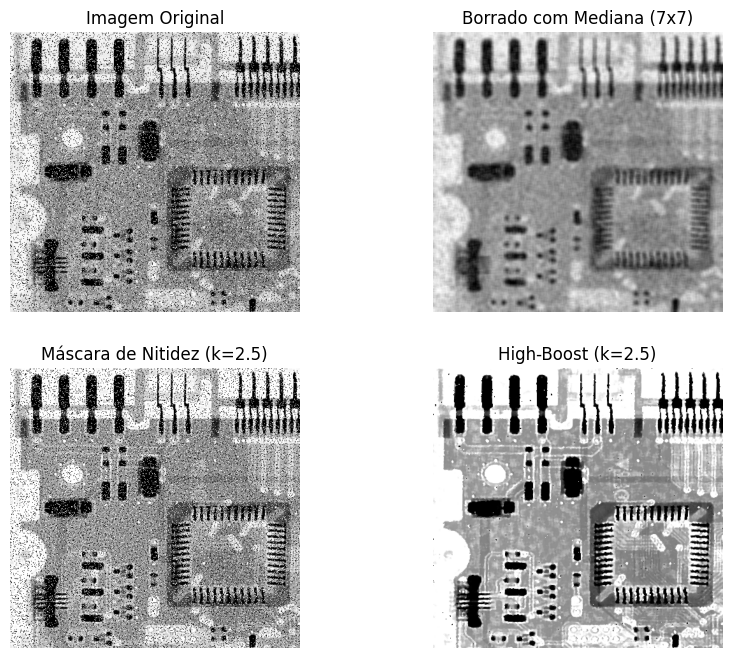

In [44]:
# --- Execução do programa ---

caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Atividade 6/FIG033~3.TIF'
#caminho_imgagem = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/flor_i_n_5.jpeg'

imagem_ori = cv2.imread(caminho_imgagem, cv2.COLOR_BGR2GRAY)

tamanho_kernel = 7

k = 2.5

filtragem_espacial_agucamento(imagem_ori, tamanho_kernel, k)
